# WebScrapping and Visualizing COVID-19 Data 

As a first step to understand webscrapping, I have gathered the covid-19 data from the [worldometers](https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/) website. Python's Beautiful Soup is utilized to perform scrapping and the scrapped data is then cleaned and visualized.

In [1]:
# Basic imports
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

In [2]:
# Part 1: Scrapping

site = requests.get('https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/').text
soup = BeautifulSoup(site, 'lxml')

data = [] #list to hold the covid data

#scrap = soup.find('td')
#print(scrap.prettify())

scrap = iter(soup.find_all('td'))

while True:
    try:
        country = next(scrap).text
        total = next(scrap).text
        deaths = next(scrap).text
        region = next(scrap).text
    
        data.append((country, total, deaths, region))
    
    except StopIteration:
        break

covid_data = pd.DataFrame(data, columns = ['Country','Total Cases','Deaths','Continent'])
print('Size of the Dataset: {}'.format(covid_data.shape))
print('\nFirst few chunks of the dataset:\n')
print(covid_data.head())

Size of the Dataset: (214, 4)

First few chunks of the dataset:

         Country Total Cases   Deaths      Continent
0  United States   6,259,992  188,961  North America
1         Brazil   3,952,790  122,681  South America
2          India   3,794,314   66,678           Asia
3         Russia   1,005,000   17,414         Europe
4           Peru     657,129   29,068  South America


In [3]:
# Let's check the datatypes of each column
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      214 non-null    object
 1   Total Cases  214 non-null    object
 2   Deaths       214 non-null    object
 3   Continent    214 non-null    object
dtypes: object(4)
memory usage: 6.8+ KB


In [4]:
# Part 2a - Data Cleaning

# converting Total Cases and Deaths to numeric types.
covid_data['Total Cases'] = pd.to_numeric(covid_data['Total Cases'].str.replace(',',''))
covid_data['Deaths'] = pd.to_numeric(covid_data['Deaths'].str.replace(',',''))

# Sort(descending order) the dataset by the number of total cases
covid_data.sort_values(by = ['Total Cases'], inplace = True, ascending = False)
print(covid_data.head(10))

         Country  Total Cases  Deaths      Continent
0  United States      6259992  188961  North America
1         Brazil      3952790  122681  South America
2          India      3794314   66678           Asia
3         Russia      1005000   17414         Europe
4           Peru       657129   29068  South America
5   South Africa       628259   14263         Africa
6       Colombia       624069   20052  South America
7         Mexico       606036   65241  North America
8          Spain       470973   29152         Europe
9      Argentina       428239    8971  South America


Text(0.5, 1.0, 'Confirmed Covid-19 cases across countries as of 02.Sept.2020')

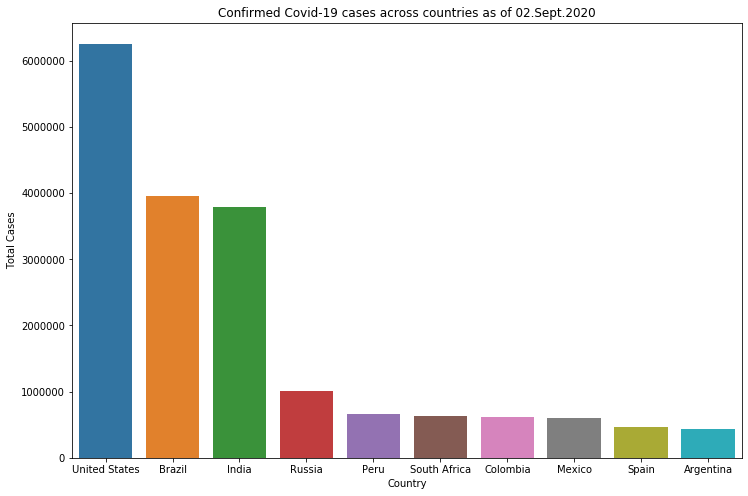

In [5]:
# Part 2b: Visualizations

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
sns.barplot(x = 'Country', y = 'Total Cases', data = covid_data.head(10))
plt.title('Confirmed Covid-19 cases across countries as of 02.Sept.2020')

The plot shows the top 10 countries worstly affected by Covid-19 pandemic.

Text(0.5, 1.0, 'Deaths due to Covid- 19 as of 02.Sept.2020')

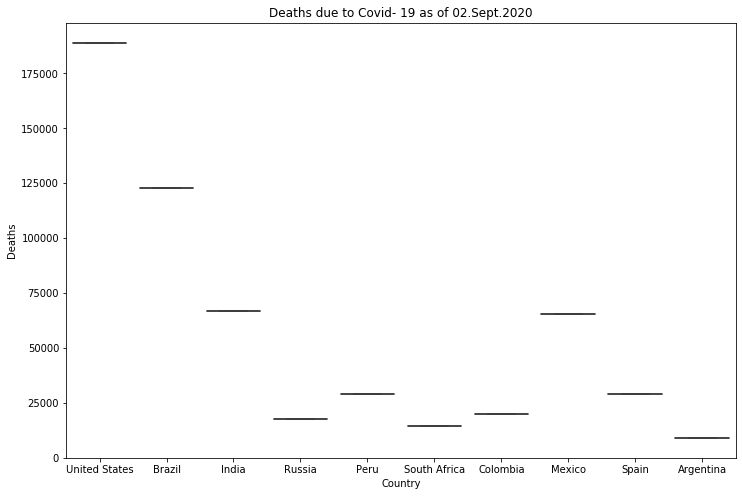

In [6]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Country', y = 'Deaths', data = covid_data.head(10))
plt.title('Deaths due to Covid- 19 as of 02.Sept.2020')

The plot shows the number of deaths due to Covid-19 in the top 10 worstly affected countries. 

           Continent  Total Cases  Deaths  Death Rate
0             Europe      3624743  208442       5.751
1      North America      7419838  273578       3.687
2      South America      6389282  204721       3.204
3  Australia/Oceania        28765     692       2.406
4             Africa      1265222   30119       2.381
5               Asia      7232987  144676       2.000


Text(0.5, 1.0, 'Covid-19 death rate across continents as of 02.Sept.2020')

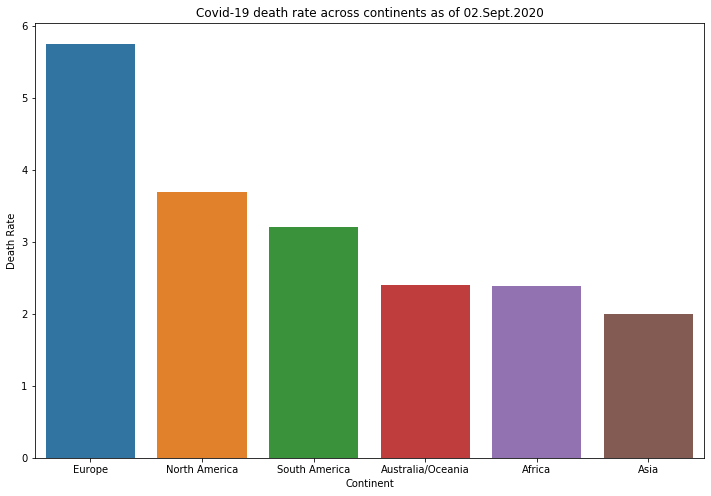

In [7]:
# Displaying data based on continent

df = covid_data.groupby('Continent').agg({'Total Cases' : np.sum, 'Deaths': np.sum})[1:]

# Death rate calculation
df['Death Rate'] = np.round((df['Deaths'] / df['Total Cases']) * 100, 3)

# Sorting (descending order) based on Death Rate
df.sort_values(by = ['Death Rate'], inplace = True, ascending = False)
df.reset_index(inplace = True)
print(df)

plt.figure(figsize = (12,8))
sns.barplot(x = 'Continent', y = 'Death Rate', data = df)
plt.title('Covid-19 death rate across continents as of 02.Sept.2020')

The plot shows the percentage of Covid-19 deaths per confirmed cases in each continent.

In [8]:
### Saving the data!

df.to_csv('covid-19-continents-data-02082020.csv', index = False)
covid_data.to_csv('covid-19-country-data-02082020.csv', index = False)
print('datasets saved...')

datasets saved...


#### Thats it!! Happy Learning! :)